In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statistics
from sklearn.linear_model import LinearRegression

### Download Latest PHMSA Survey Data and Filter for Main Mileage, Service Mileage, and Leaks

In [2]:
year = 2020
filename = 'PHMSA_Distribution_Data_2010_2020/annual_gas_distribution_' + str(year) + '.xlsx'
tdf = pd.read_excel(filename)
tdf.columns = tdf.iloc[1]
tdf = tdf.drop([0,1]).reset_index(drop=True)
tdf['SRVCS_MILES_TOTAL'] = [tdf.at[i,'AVERAGE_LENGTH']*tdf.at[i,'NUM_SRVCS_TOTAL']/5280 for i in tdf.index]
basic_info_cols = ['OPERATOR_NAME','OPERATOR_ID','OPERATOR_TYPE','STOP','MMILES_TOTAL','SRVCS_MILES_TOTAL','AVERAGE_LENGTH','NUM_SRVCS_TOTAL']
mmiles_historic_cols = [str(i) for i in tdf.columns if "MMILES_BY" in i]
srvs_historic_cols = [str(i) for i in tdf.columns if "NUM_SRVS_BY" in i]
leaks_cols = [str(i) for i in tdf.columns if "TOTAL_LEAKS" in i]
hazleaks_cols = [str(i) for i in tdf.columns if "TOTAL_HAZLEAKS" in i]
tdf = tdf.filter(basic_info_cols + mmiles_historic_cols + srvs_historic_cols + leaks_cols + hazleaks_cols)
tot_leaks = [0 for _ in tdf.index]
tot_hazleaks = [0 for _ in tdf.index]
for i in tdf.index:
    tot_leaks[i] = sum(tdf.iloc[i,31:47])
    tot_hazleaks[i] = sum(tdf.iloc[i,47:])
tdf = tdf.drop(columns=[i for i in tdf.columns if ('TOTAL_LEAKS' in i) or ('TOTAL_HAZLEAKS'in i)])
tdf = tdf.drop(columns=['MMILES_BY_DCD_TOTAL','NUM_SRVS_BY_DCD_TOTAL'])
tdf['TOTAL_LEAKS_'+str(year)] = tot_leaks
tdf['HAZARDOUS_LEAKS_'+str(year)] = tot_hazleaks

In [14]:
sum(tdf[(tdf.STOP=='CA')]['MMILES_TOTAL'])

107898.58099999998

In [3]:
dfmo = tdf[tdf.OPERATOR_TYPE=='Municipal Owned'].reset_index(drop=True)
dfio = tdf[tdf.OPERATOR_TYPE=='Investor Owned'].reset_index(drop=True)
dfpo = tdf[tdf.OPERATOR_TYPE=='Privately Owned'].reset_index(drop=True)
dfco = tdf[tdf.OPERATOR_TYPE=='Cooperative'].reset_index(drop=True)
dfs = [dfmo,dfio,dfpo,dfco,tdf]
dfnames = ['Municipal Owned','Investor Owned','Privately Owned','Cooperative','Total']
finals = []
for i in range(5):
    tot1 = ['Total','',dfnames[i],'']
    mt = [int(sum(dfs[i]['MMILES_TOTAL']))]
    st = [round(sum(dfs[i]['SRVCS_MILES_TOTAL']),2)]
    al = [round(sum(dfs[i]['AVERAGE_LENGTH'])/len(dfs[i].index),2)]
    rest = [round(sum(dfs[i][j]),2) for j in dfs[i].columns[7:]]
    data = tot1+mt+st+al+rest
    finals.append(data)
for i in range(5):
    tdf.loc[len(tdf.index)] = finals[i]
tdf = tdf.iloc[::-1].reset_index(drop=True)
tdf['Main Lines over 50 Years Old'] = [int(tdf.loc[i,'MMILES_BY_DCD_1940_TO_1949']+tdf.loc[i,'MMILES_BY_DCD_1940_TO_1949']+tdf.loc[i,'MMILES_BY_DCD_1950_TO_1959']+tdf.loc[i,'MMILES_BY_DCD_1960_TO_1969']+(1.5/10)*tdf.loc[i,'MMILES_BY_DCD_1970_TO_1979']) for i in tdf.index]

In [4]:
tdf.head(5)

1,OPERATOR_NAME,OPERATOR_ID,OPERATOR_TYPE,STOP,MMILES_TOTAL,SRVCS_MILES_TOTAL,AVERAGE_LENGTH,NUM_SRVCS_TOTAL,MMILES_BY_DCD_UNK,MMILES_BY_DCD_PRE1940,MMILES_BY_DCD_1940_TO_1949,MMILES_BY_DCD_1950_TO_1959,MMILES_BY_DCD_1960_TO_1969,MMILES_BY_DCD_1970_TO_1979,MMILES_BY_DCD_1980_TO_1989,MMILES_BY_DCD_1990_TO_1999,MMILES_BY_DCD_2000_TO_2009,MMILES_BY_DCD_2010_TO_2019,MMILES_BY_DCD_2020_TO_2029,NUM_SRVS_BY_DCD_UNK,NUM_SRVS_BY_DCD_PRE1940,NUM_SRVS_BY_DCD_1940_TO_1949,NUM_SRVS_BY_DCD_1950_TO_1959,NUM_SRVS_BY_DCD_1960_TO_1969,NUM_SRVS_BY_DCD_1970_TO_1979,NUM_SRVS_BY_DCD_1980_TO_1989,NUM_SRVS_BY_DCD_1990_TO_1999,NUM_SRVS_BY_DCD_2000_TO_2009,NUM_SRVS_BY_DCD_2010_TO_2019,NUM_SRVS_BY_DCD_2020_TO_2029,TOTAL_LEAKS_2020,HAZARDOUS_LEAKS_2020,Main Lines over 50 Years Old
0,Total,,Total,,1328471,955392.67,90.24,70457327,86833.8,36803.6,20520.8,95865,183679,127067,157245,233167,205658,165415,16209.7,4524901,938161,786885,3584483,6058834,7324504,9682134,12974297,12448152,11056405,1080227,70945986,219311,339645
1,Total,,Cooperative,,10438,3250.37,111.86,207231,699.61,122.13,305.15,221.65,1346.89,693.47,860.6,1915,2071.34,1978.84,225.57,19891,3440,2396,5546,13208,15414,16894,39164,44293,42643,4350,208340,410,2282
2,Total,,Privately Owned,,75125,48231.28,147.66,3516475,1768.09,1010.22,679.02,3770.21,10359.5,8491.21,10166.9,15097,13066.1,9750.77,966.81,180492,21958,11721,130389,222381,371051,456767,730495,762242,573300,55664,3536765,9376,16761
3,Total,,Investor Owned,,1094649,816274.48,82.34,61179248,70651.5,34009,18348.3,79951.2,154728,106882,129582,184812,167300,135803,12580.2,3827700,839161,697679,3133544,5373967,6475658,8507296,11076638,10685804,9645854,916506,61607442,193390,287408
4,Total,,Municipal Owned,,148258,87636.54,80.49,5554373,13714.6,1662.25,1188.35,11921.9,17244.7,11000.4,16635.6,31343.5,23220.5,17881.4,2437.19,496818,73602,75089,315004,449278,462381,701177,1128000,955813,794608,103707,5593439,16135,33193


### Create Time Series Data For Total Services in the Last 10 Years:

In [5]:
opid_to_years = dict()
for i in tdf.index:
    opid = tdf.at[i,'OPERATOR_ID']
    opid_to_years[opid] = dict()
    opid_to_years[opid]['Operator Name'] = tdf.at[i,'OPERATOR_NAME']
    opid_to_years[opid]['Operator Type'] = tdf.at[i,'OPERATOR_TYPE']
    opid_to_years[opid]['State'] = tdf.at[i,'STOP']
    for y in range(2010,year+1):
        opid_to_years[opid][str(y)] = 0
for i in range(2010,year+1):
    year = str(i)
    filename = 'PHMSA_Distribution_Data_2010_2020/annual_gas_distribution_' + str(year) + '.xlsx'
    tdf = pd.read_excel(filename)
    tdf.columns = tdf.iloc[1]
    tdf = tdf.drop([0,1]).reset_index(drop=True)
    for i in tdf.index:
        try:
            opid = tdf.at[i,'OPERATOR_ID']
            opid_to_years[opid][year] = tdf.at[i,'NUM_SRVS_BY_DCD_TOTAL']
        except:
            None
for i in [year]:
    year = str(i)
    filename = 'PHMSA_Distribution_Data_2010_2020/annual_gas_distribution_' + str(year) + '.xlsx'
    tdf = pd.read_excel(filename)
    tdf.columns = tdf.iloc[1]
    tdf = tdf.drop([0,1]).reset_index(drop=True)
    for i in tdf.index:
        try:
            opid = tdf.at[i,'OPERATOR_ID']
            opid_to_years[opid][year] = tdf.at[i,'NUM_SRVS_BY_DCD_TOTAL']
        except:
            None
srvs10 = pd.DataFrame(opid_to_years).T
srvs10a = srvs10.copy().reset_index()
srvs10a.columns = ['Operator ID'] + list(srvs10.columns[0:])

In [6]:
srvs10a.head(5)

,Operator ID,Operator Name,Operator Type,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,,Total,Municipal Owned,,0,0,0,0,0,0,0,0,0,0,0
1,40247,"TEXAS REPUBLIC UTILITY, LLC",Investor Owned,TX,0,0,0,0,0,0,0,0,0,0,167
2,40246,"RAVEN FOREST OPERATING, LLC",Investor Owned,TX,0,0,0,0,0,0,0,0,0,0,0
3,40196,EVERSOURCE GAS OF MASSACHUSETTS,Investor Owned,MA,0,0,0,0,0,0,0,0,0,0,280051
4,40188,TRAER MUNICIPAL UTILITIES,Municipal Owned,IA,0,0,0,0,0,0,0,0,0,0,794


### Create Time Series Data for Total Main Mileage in Past 10 Years

In [7]:
opid_to_years = dict()
for i in tdf.index:
    opid = tdf.at[i,'OPERATOR_ID']
    opid_to_years[opid] = dict()
    opid_to_years[opid]['Operator Name'] = tdf.at[i,'OPERATOR_NAME']
    opid_to_years[opid]['Operator Type'] = tdf.at[i,'OPERATOR_TYPE']
    opid_to_years[opid]['State'] = tdf.at[i,'STOP']
    for y in range(2010,2021):
        opid_to_years[opid][str(y)] = 0
for i in range(2010,2020):
    year = str(i)
    filename = 'PHMSA_Distribution_Data_2010_2020/annual_gas_distribution_' + str(year) + '.xlsx'
    tdf = pd.read_excel(filename)
    tdf.columns = tdf.iloc[1]
    tdf = tdf.drop([0,1]).reset_index(drop=True)
    for i in tdf.index:
        try:
            opid = tdf.at[i,'OPERATOR_ID']
            opid_to_years[opid][year] = tdf.at[i,'MMILES_BY_DCD_TOTAL']
        except:
            None
for i in [2020]:
    year = str(i)
    filename = 'PHMSA_Distribution_Data_2010_2020/annual_gas_distribution_' + str(year) + '.xlsx'
    tdf = pd.read_excel(filename)
    tdf.columns = tdf.iloc[1]
    tdf = tdf.drop([0,1]).reset_index(drop=True)
    for i in tdf.index:
        try:
            opid = tdf.at[i,'OPERATOR_ID']
            opid_to_years[opid][year] = tdf.at[i,'MMILES_BY_DCD_TOTAL']
        except:
            None
mmiles10 = pd.DataFrame(opid_to_years).T
mmiles10a = mmiles10.copy().reset_index()
mmiles10a.columns = ['Operator ID'] + list(mmiles10.columns[0:])

In [8]:
mmiles10a.head()

,Operator ID,Operator Name,Operator Type,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,18,"ABBYVILLE, CITY OF",Municipal Owned,KS,3,3,3,3,3,3,3,3,3,3,3
1,27,ABITA SPRINGS NAT GAS & WATER,Municipal Owned,LA,28,28,28,28,28,28,28,28,28,28,28
2,45,"ADAIRSVILLE, CITY OF",Municipal Owned,GA,70.5,72.4,73.7,74.23,79.43,86.7,91.68,87.73,88.31,90.09,114.31
3,49,TOWN OF ADAMSVILLE GAS DEPT,Municipal Owned,TN,158.3,159.01,164.247,164.247,165.444,168.36,171.05,171.05,171.05,171.141,171.141
4,54,"ADEL GAS DEPT, CITY OF",Municipal Owned,GA,36.5,36.5,36.5,36.5,36.5,36.5,50,55.6,55.6,58.7,58.31


(0, 1000)

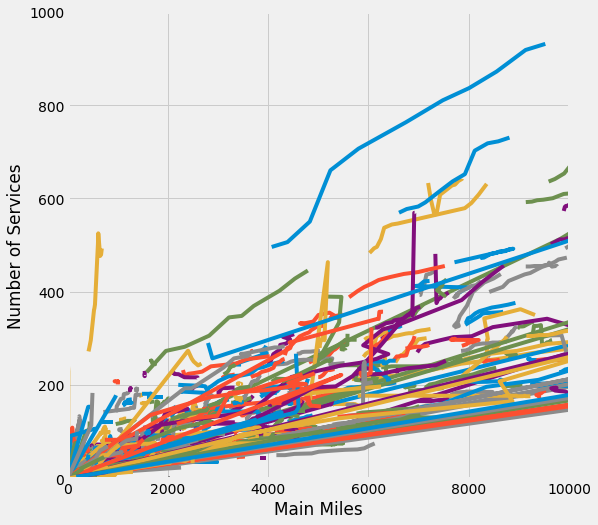

In [243]:
plt.figure(figsize=(8,8))
plt.xlabel('Main Miles')
plt.ylabel('Number of Services')
for i in list(srvs10a['Operator ID'].unique()):
    srvs = list(srvs10a[srvs10a['Operator ID']==i].iloc[0,4:])
    mils = list(mmiles10a[mmiles10a['Operator ID']==i].iloc[0,4:])
    plt.plot(srvs,mils)
plt.xlim(0,10000)
plt.ylim(0,1000)

In [9]:
srvs10 = pd.DataFrame(opid_to_years).T
year_range = list(range(2011,2020))
year_range.reverse()
for i in year_range:
    for idx in srvs10a.index:
        srvs10a.at[idx,str(i)] =  srvs10.at[idx,str(i)] -  srvs10.at[idx,str(int(i)-1)]
miles10a = miles10a.reset_index()
miles10a.columns = ['Operator ID'] + list(miles10a.columns[1:])
milesmo = miles10a[miles10a['Operator Type']=='Municipal Owned'].reset_index(drop=True)
milesio = miles10a[miles10a['Operator Type']=='Investor Owned'].reset_index(drop=True)
milespo = miles10a[miles10a['Operator Type']=='Privately Owned'].reset_index(drop=True)
milesco = miles10a[miles10a['Operator Type']=='Cooperative'].reset_index(drop=True)
dfs = [milesmo,milesio,milespo,milesco,miles10a]
dfnames = ['Municipal Owned','Investor Owned','Privately Owned','Cooperative','Total']
finals = []
for i in range(5):
    tot = ['','Total',dfnames[i],'']
    mt = [int(sum(dfs[i][str(year)])) for year in range(2010,2021)]
    data = tot+mt
    finals.append(data)
for i in range(5):
    miles10a.loc[len(miles10a.index)] = finals[i]
miles10a = miles10a.iloc[::-1].reset_index(drop=True)

KeyError: 0

### Create Time Series Data For Main Mileage Installed in the Last 10 Years:

In [10]:
opid_to_years = dict()
for i in tdf.index:
    opid = tdf.at[i,'OPERATOR_ID']
    opid_to_years[opid] = dict()
    opid_to_years[opid]['Operator Name'] = tdf.at[i,'OPERATOR_NAME']
    opid_to_years[opid]['Operator Type'] = tdf.at[i,'OPERATOR_TYPE']
    opid_to_years[opid]['State'] = tdf.at[i,'STOP']
    for y in range(2010,2021):
        opid_to_years[opid][str(y)] = 0
for i in range(2010,2020):
    year = str(i)
    filename = 'PHMSA_Distribution_Data_2010_2020/annual_gas_distribution_' + str(year) + '.xlsx'
    tdf = pd.read_excel(filename)
    tdf.columns = tdf.iloc[1]
    tdf = tdf.drop([0,1]).reset_index(drop=True)
    for i in tdf.index:
        try:
            opid = tdf.at[i,'OPERATOR_ID']
            opid_to_years[opid][year] = tdf.at[i,'MMILES_BY_DCD_2010_TO_2019']
        except:
            None
for i in [2020]:
    year = str(i)
    filename = 'PHMSA_Distribution_Data_2010_2020/annual_gas_distribution_' + str(year) + '.xlsx'
    tdf = pd.read_excel(filename)
    tdf.columns = tdf.iloc[1]
    tdf = tdf.drop([0,1]).reset_index(drop=True)
    for i in tdf.index:
        try:
            opid = tdf.at[i,'OPERATOR_ID']
            opid_to_years[opid][year] = tdf.at[i,'MMILES_BY_DCD_2020_TO_2029']
        except:
            None
miles10 = pd.DataFrame(opid_to_years).T
miles10a = miles10.copy()
year_range = list(range(2011,2020))
year_range.reverse()
for i in year_range:
    for idx in miles10a.index:
        miles10a.at[idx,str(i)] =  miles10.at[idx,str(i)] -  miles10.at[idx,str(int(i)-1)]
miles10a = miles10a.reset_index()
miles10a.columns = ['Operator ID'] + list(miles10a.columns[1:])
milesmo = miles10a[miles10a['Operator Type']=='Municipal Owned'].reset_index(drop=True)
milesio = miles10a[miles10a['Operator Type']=='Investor Owned'].reset_index(drop=True)
milespo = miles10a[miles10a['Operator Type']=='Privately Owned'].reset_index(drop=True)
milesco = miles10a[miles10a['Operator Type']=='Cooperative'].reset_index(drop=True)
dfs = [milesmo,milesio,milespo,milesco,miles10a]
dfnames = ['Municipal Owned','Investor Owned','Privately Owned','Cooperative','Total']
finals = []
for i in range(5):
    tot = ['','Total',dfnames[i],'']
    mt = [int(sum(dfs[i][str(year)])) for year in range(2010,2021)]
    data = tot+mt
    finals.append(data)
for i in range(5):
    miles10a.loc[len(miles10a.index)] = finals[i]
miles10a = miles10a.iloc[::-1].reset_index(drop=True)

In [11]:
miles10a.columns = list(miles10a.columns[0:4]) + [str(i) + ' - Main Miles Built' for i in range(2010,2021)]

In [159]:
miles10a.to_csv('PHMSA Cleaned Data/Main_Mile_Construction_2010_2020.csv')

In [158]:
miles10a.head()

,Operator ID,Operator Name,Operator Type,State,2010 - Main Miles Built,2011 - Main Miles Built,2012 - Main Miles Built,2013 - Main Miles Built,2014 - Main Miles Built,2015 - Main Miles Built,2016 - Main Miles Built,2017 - Main Miles Built,2018 - Main Miles Built,2019 - Main Miles Built,2020 - Main Miles Built
0,,Total,Total,,8288,9734,10823,12367,14671,11894,14861,14213,15950,16672,12997
1,,Total,Cooperative,,111,111,335,249,140,141,76,63,277,206,159
2,,Total,Privately Owned,,412,607,548,737,677,777,550,974,800,1121,741
3,,Total,Investor Owned,,5405,7496,8388,9920,12205,8819,12315,11697,12823,13576,9663
4,,Total,Municipal Owned,,2359,1519,1550,1460,1648,2156,1919,1477,2048,1767,2433


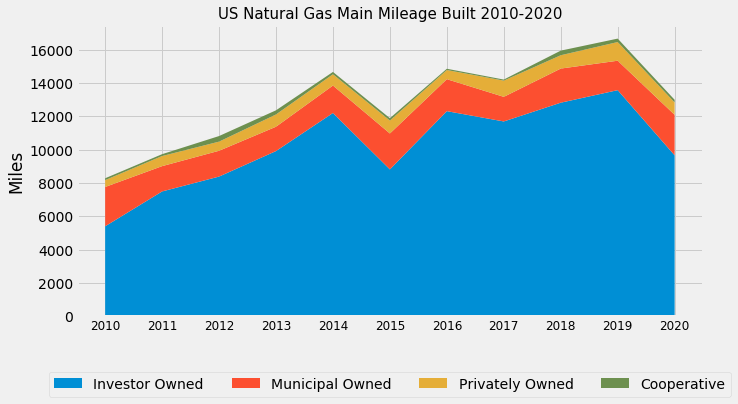

In [153]:
plt.figure(figsize = (10,5))
plt.style.use('fivethirtyeight')
co_sum = list(miles10a.iloc[1,4:])
po_sum = list(miles10a.iloc[2,4:])
io_sum = list(miles10a.iloc[3,4:])
mo_sum = list(miles10a.iloc[4,4:])
plt.stackplot(list(range(2010,2021)), io_sum, mo_sum, po_sum, co_sum, labels=['Investor Owned','Municipal Owned','Privately Owned','Cooperative'])
#plt.ylim(0,max_val*1.1)
plt.ylabel('Miles')
#plt.yticks(np.arange(0,max_val*1.1, step=5000), fontsize=12)
plt.xticks((np.arange(2010, 2021, step=1)), fontsize=12)
plt.title('US Natural Gas Main Mileage Built 2010-2020', fontsize=15)
plt.legend(loc='lower center',fontsize=14, ncol=4, bbox_to_anchor=(0.5, -0.3))
plt.show()

In [131]:
miles10a.head(10)

,Operator ID,Operator Name,Operator Type,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,,Total,Total,,8288,9734,10823,12367,14671,11894,14861,14213,15950,16672,12997
1,,Total,Cooperative,,111,111,335,249,140,141,76,63,277,206,159
2,,Total,Privately Owned,,412,607,548,737,677,777,550,974,800,1121,741
3,,Total,Investor Owned,,5405,7496,8388,9920,12205,8819,12315,11697,12823,13576,9663
4,,Total,Municipal Owned,,2359,1519,1550,1460,1648,2156,1919,1477,2048,1767,2433
5,40247,"TEXAS REPUBLIC UTILITY, LLC",Investor Owned,TX,0,0,0,0,0,0,0,0,0,0,3.18
6,40246,"RAVEN FOREST OPERATING, LLC",Investor Owned,TX,0,0,0,0,0,0,0,0,0,0,6.54
7,40196,EVERSOURCE GAS OF MASSACHUSETTS,Investor Owned,MA,0,0,0,0,0,0,0,0,0,0,26
8,40188,TRAER MUNICIPAL UTILITIES,Municipal Owned,IA,0,0,0,0,0,0,0,0,0,0,0
9,40137,"CITIPOWER, LLC",Privately Owned,KY,0,0,0,0,0,0,0,0,0,0,0


In [113]:
miles10a[miles10a['Operator Name']=='Total'].head()

,Operator Name,Operator Type,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Total,Privately Owned,,412,607,548,737,677,777,550,974,800,1121,741
1,Total,Investor Owned,,5405,7496,8388,9920,12205,8819,12315,11697,12823,13576,9663
2,Total,Municipal Owned,,2359,1519,1550,1460,1648,2156,1919,1477,2048,1767,2433
1255,Total,Total,,8288,9734,10823,12367,14671,11894,14861,14213,15950,16672,12997


In [14]:
sum(tdf[tdf.OPERATOR_NAME!='Total']['HAZARDOUS_LEAKS_2020'])

219311

### Create DataFrame for most up to date main pipeline data

In [4]:
mmiles = tdf.copy()

In [5]:
mmiles = mmiles.filter(['OPERATOR_NAME','OPERATOR_ID','OPERATOR_TYPE','STOP','MMILES_TOTAL','MMILES_BY_DCD_UNK', 'MMILES_BY_DCD_PRE1940','MMILES_BY_DCD_1940_TO_1949', 'MMILES_BY_DCD_1950_TO_1959',
       'MMILES_BY_DCD_1960_TO_1969', 'MMILES_BY_DCD_1970_TO_1979','MMILES_BY_DCD_1980_TO_1989', 'MMILES_BY_DCD_1990_TO_1999',
       'MMILES_BY_DCD_2000_TO_2009', 'MMILES_BY_DCD_2010_TO_2019','MMILES_BY_DCD_2020_TO_2029','Main Lines over 50 Years Old'])

In [6]:
mmiles.columns = ['Operator Name','Operator ID','Operator Type','State','Total Main Miles','Main Miles Built in Unknown Decade','Main Miles Built Pre-1940','Main Miles Built 1940-49','Main Miles Built 1950-59','Main Miles Built 1960-69','Main Miles Built 1970-79','Main Miles Built 1980-89','Main Miles Built 1990-99','Main Miles Built 2000-09','Main Miles Built 2010-19','Main Miles Built 2020-29','Main Miles over 50 Years Old']

In [7]:
ages = [1925,1945,1955,1965,1975,1985,1995,2005,2015,2020]
cols = list(mmiles.columns[6:-1])
mileage_age = [0 for _ in mmiles.index]
for i in mmiles.index:
    age = 0
    for j in range(len(ages)):
        age += mmiles.at[i,cols[j]]*(2021-ages[j])
    try:
        mileage_age[i] = int(age/(mmiles.at[i,'Total Main Miles']-mmiles.at[i,'Main Miles Built in Unknown Decade']))
    except:
        None
mmiles['Main Mileage Average Age'] = mileage_age

In [9]:
mmiles.sort_values(by=['Main Mileage Average Age'],ascending=False).head(20)

,Operator Name,Operator ID,Operator Type,State,Total Main Miles,Main Miles Built in Unknown Decade,Main Miles Built Pre-1940,Main Miles Built 1940-49,Main Miles Built 1950-59,Main Miles Built 1960-69,Main Miles Built 1970-79,Main Miles Built 1980-89,Main Miles Built 1990-99,Main Miles Built 2000-09,Main Miles Built 2010-19,Main Miles Built 2020-29,Main Miles over 50 Years Old,Main Mileage Average Age
285,CITY OF PIKEVILLE,30568,Municipal Owned,KY,69,0,65,0,0,0,0,0,0,2,2,0,0,91
1051,GLOSTER MUNICIPAL GAS SYSTEM,6410,Municipal Owned,MS,16.75,0,14,0,0,0,0,0,0,1,1,0.75,0,81
266,"TUMLINSON ENGINEERING, INC",30863,Privately Owned,TN,7,0,0,7,0,0,0,0,0,0,0,0,14,76
586,"ROBERTSDALE GAS SYSTEM, CITY OF",17556,Municipal Owned,AL,13.422,0,0,13.27,0,0,0,0,0,0,0.152,0,26,75
1354,"BERWICK, TOWN OF",1376,Municipal Owned,LA,24,0,10,0,5,5,3,1,0,0,0,0,10,72
954,"IOTA GAS DEPT, TOWN OF",8230,Municipal Owned,LA,26,0,0,22,0,0,0,0,4,0,0,0,44,68
1247,"CLAY NATURAL GAS SYSTEM, CITY OF",2472,Municipal Owned,KY,24,0,0,20,0,0,1,0,3,0,0,0,40,68
681,"PATTERSON GAS DEPT, CITY OF",15161,Municipal Owned,LA,34,0,0,12,17,4,1,0,0,0,0,0,45,67
1277,"CHATTAHOOCHEE, CITY OF",2289,Municipal Owned,FL,19,0,0,0,19,0,0,0,0,0,0,0,19,66
771,"MOUNTAINAIR, TOWN OF",12894,Municipal Owned,NM,27,0,0,0,27,0,0,0,0,0,0,0,27,66


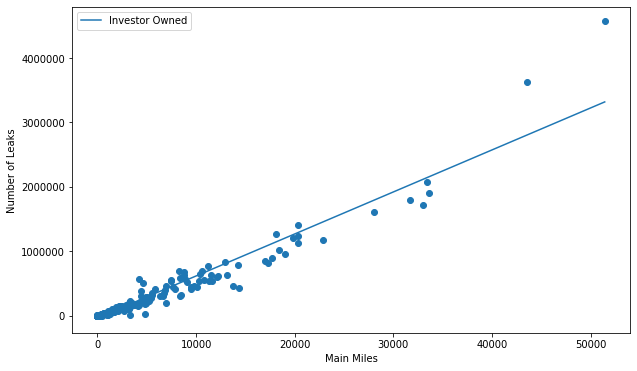

In [10]:
plt.figure(figsize=(10,6))
for df in [dfio]:
    x = list(df['MMILES_TOTAL'])
    y = list(df['TOTAL_LEAKS_2020'])
    #mymodel = np.poly1d(np.polyfit(x, y, 2))
    mymodel2 = np.poly1d(np.polyfit(x, y, 1))
    myline = np.linspace(0, max(x), 6000)
    plt.scatter(x, y)
    #plt.plot(myline, mymodel(myline))
    plt.plot(myline, mymodel2(myline), label=df.loc[0,'OPERATOR_TYPE'])
    plt.ylabel('Number of Leaks')
    plt.xlabel('Main Miles')
plt.legend()
    #plt.show()
    #plt.close()